In [1]:
from HouseholdSpecializationModelFindsen import HouseholdSpecializationModelClass
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Question 1
We loop over different values of $\alpha$ and $\sigma$

In [2]:
#Setting up household
model = HouseholdSpecializationModelClass()

par = model.par
sol = model.sol

#Creating arrays for alpha and sigma
alpha_vec = np.array([0.25,0.50,0.75])
sigma_vec = np.array([0.5,1,1.5])

out = np.zeros((len(alpha_vec),len(sigma_vec)))

for i_a, a in enumerate(alpha_vec):
    for i_s ,s in enumerate(sigma_vec):
        
        opt = model.solve_discrete(alpha=a,sigma=s)
        
        out[i_a,i_s]=opt.HF/opt.HM

C:\Users\B051733\Downloads\projects-2023-f-m-r-23-main\projects-2023-f-m-r-23-main\inauguralproject\HouseholdSpecializationModelFindsen.py:68: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))


# Question 2

In [3]:
model.solve_wF_vec(discrete=True)
lH_vec_disc = par.lH_vec.copy()

# Question 3

In [4]:
model.solve_wF_vec(discrete=False)
lH_vec_cont = par.lH_vec.copy()

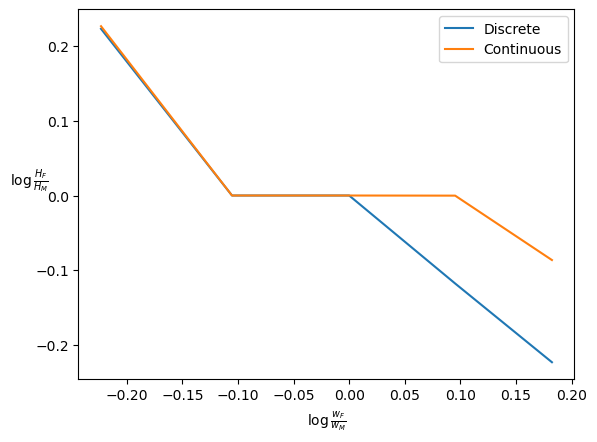

In [5]:
fig, ax = plt.subplots(dpi=100)

ax.plot(par.lw_vec,lH_vec_disc,label='Discrete')
ax.plot(par.lw_vec,lH_vec_cont,label='Continuous')
ax.set_ylabel(r'$\log\frac{H_F}{H_M}$',rotation=0)
ax.set_xlabel(r'$\log\frac{w_F}{w_M}$')

plt.legend()
plt.show()

In [6]:
model.run_regression()

# Question 4

In [7]:
model.estimate(do_print=True)

C:\Users\B051733\Downloads\projects-2023-f-m-r-23-main\projects-2023-f-m-r-23-main\inauguralproject\HouseholdSpecializationModelFindsen.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))
C:\Users\B051733\Downloads\projects-2023-f-m-r-23-main\projects-2023-f-m-r-23-main\inauguralproject\HouseholdSpecializationModelFindsen.py:68: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))


Optimization terminated successfully.
alpha_hat: 0.9883
sigma_hat: 0.0908
beta0_hat: 0.4000
beta1_hat: -0.0999
Termination value: 0.0000


$\frac{Q^{1-\rho}}{1-\rho} - \nu\Bigg(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} + \frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} + \delta(L_F-\mu)^2\Bigg)$

# Question 5

In [8]:
par.dummy = 1
par.alpha = 0.5

In [9]:
model.estimate_(do_print=True)

Optimization terminated successfully.
sigma_hat: 0.2798
mu_hat: 1.1144
beta0_hat: 0.0868
beta1_hat: -0.1574
Termination value: 0.1014
